## About data:

We have some basic data about customers like Customer ID, age, gender, annual income and spending score. Spending Score is assigned to the customer based on some parameters like customer behavior and purchasing data. We will try to cluster this data according to these features.


K-means clustering is a type of unsupervised learning which is used when you have unlabeled data. By using this algorithm you will try to find groups in the data. "k" value represent number of groups.

Dataset: https://www.kaggle.com/shwetabh123/mall-customers(for more detail just follow this link)

####  1. importing libraries &  dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 2. EDA

#### 2.1 Rename the column Genre as Gender

In [3]:
dataset.rename(columns={"Genre":"Gender"}, inplace = True)
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### 2.2 identifying  the missing values

In [4]:
# info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


####  2.3 Customer gender visualization

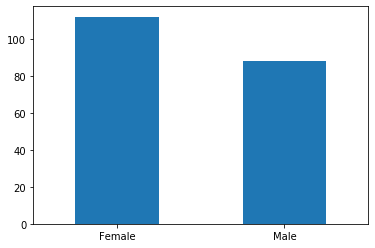

In [7]:
df_gen  = dataset['Gender']
df_gen.value_counts().plot(kind = 'bar', rot = 0)

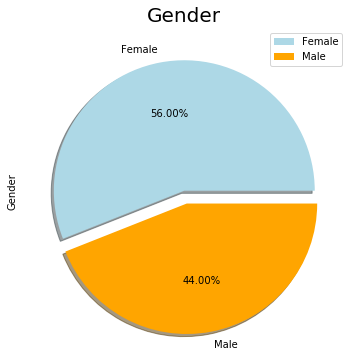

In [8]:
plt.figure(figsize = (10,6))
df_gen.value_counts().plot(kind = 'pie', legend = 1,autopct = '%0.2f%%', explode = [0,0.1], shadow = True, colors = ['lightblue', 'orange'])
plt.title('Gender', fontsize = 20)

plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall
Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females

####  2.4 Age Distribution

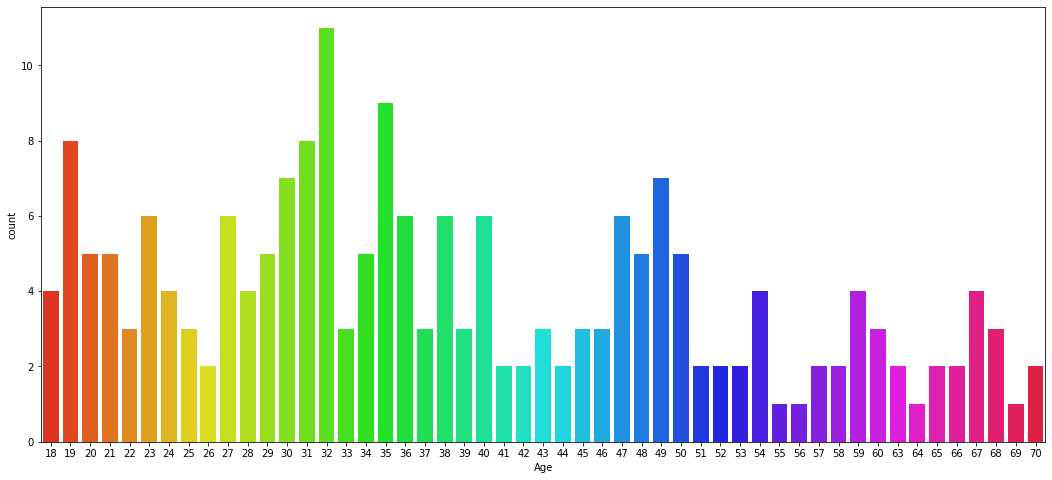

In [9]:
plt.figure(figsize = (18,8))
sns.countplot(dataset['Age'], palette = 'hsv')

By looking at the above graph, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

####  2.5 Salary Distribution

###### Annual Income Analysis

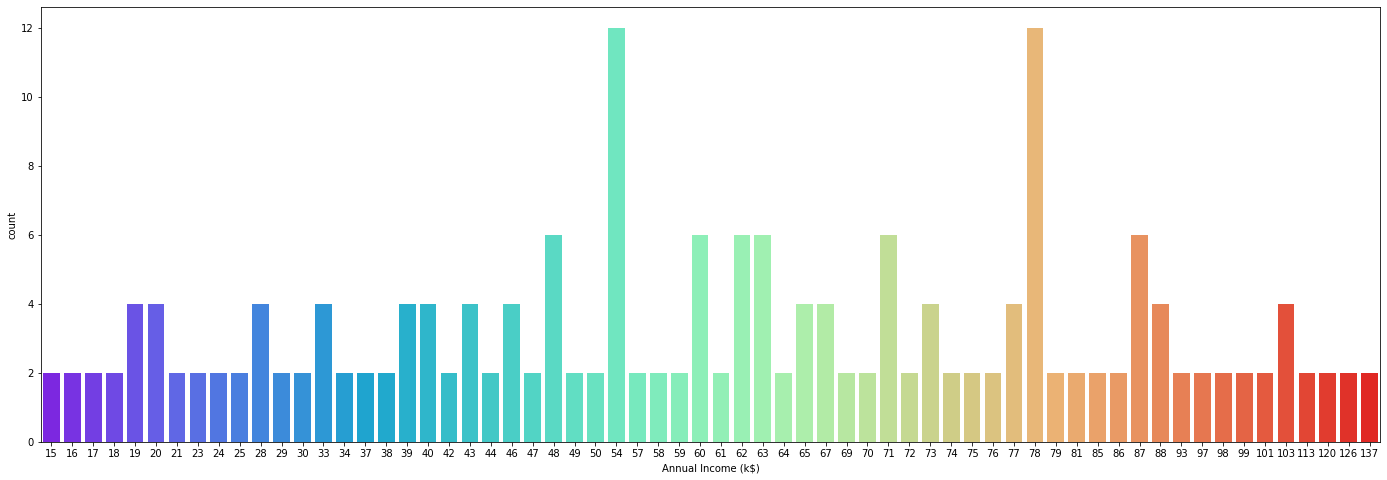

In [10]:
plt.figure(figsize  = (24,8))
sns.countplot(dataset['Annual Income (k$)'], palette = 'rainbow')


- Again, This is also a chart to better explain the Distribution of Each Income level. 
- There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78 US Dollars.


####  2.6 Spending Score Distribution

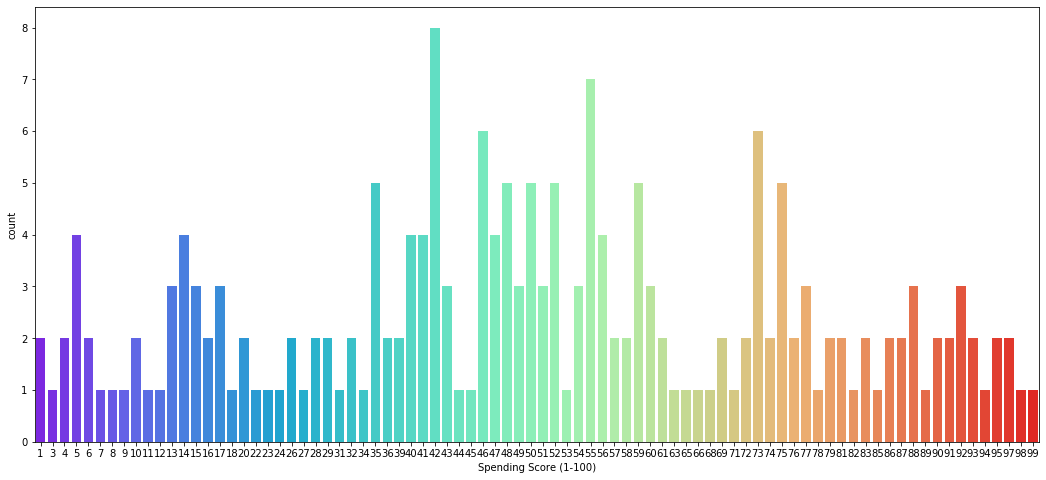

In [11]:
plt.figure(figsize = (18,8))
sns.countplot(dataset['Spending Score (1-100)'], palette = 'rainbow')

- On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. 


####  2.7 pair plot

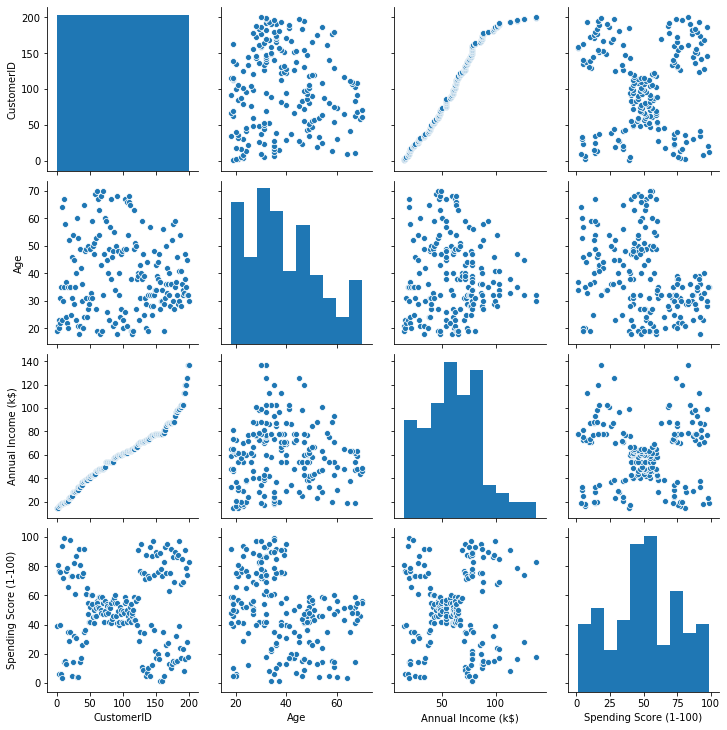

In [12]:
sns.pairplot(dataset)

- Here above we can see that Annual Income(K$) and spending scores can be form  into 5 cluster.


####  2.8 finding Correlation b/w features

In [13]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


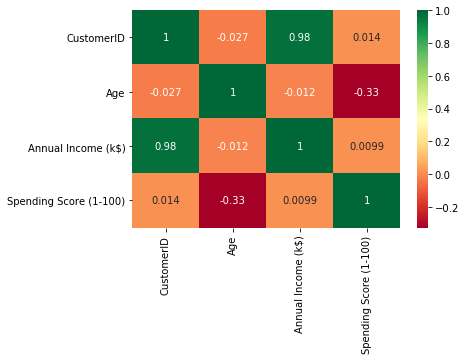

In [14]:
sns.heatmap(dataset.corr(), annot  = True, cmap = 'RdYlGn')

- here  above the chart we can see  that Annual Income is highly corrrelated with Spending Score.


### 3. Data preparing

####  independent dataset

In [15]:
X = dataset.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

- Note: here we don't have dependent variable,So here we can  apply clustering method for this dataset.

### 4. Clustering Analysis

####  4.1 Using Elbow method the find out No. of Clusters

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



#### 4.2 plotting the Elbow method

 Now we will try to find what "k" value we should use. We will find out it with "elbow method

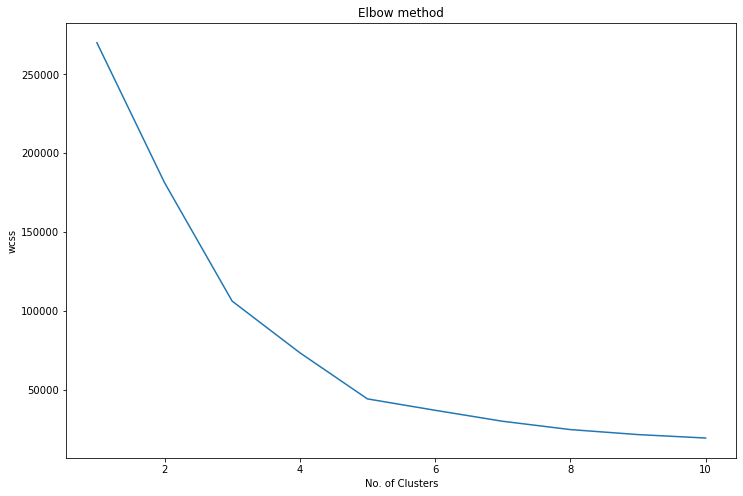

In [17]:
plt.figure(figsize = (12,8))
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()



###### Note : At a first glance we can see 5 cluster is better in the above  graph for the dataset

#### 4.3  Applying the KMeans to the dataset

In [18]:

kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### 5. visualizing the final result 

##### plotting  the clusters

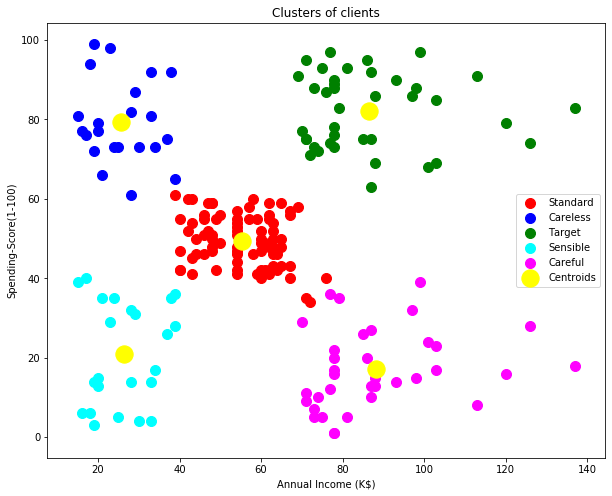

In [19]:
plt.figure(figsize = (10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100 , c = "red", label = "Standard")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100 , c = "blue", label = "Careless")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100 , c = "green", label = "Target")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100 , c = "cyan", label = "Sensible")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100 , c = "magenta", label = "Careful")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "yellow", label = "Centroids" )

plt.title("Clusters of clients")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending-Score(1-100)")
plt.legend()
plt.show()


#### We have 5 type of customer and we grouped them as you can see above

- Cluster 1- Medium income medium spending =Standard

- Cluster 2- Low Income and high spending =Careless

- Cluster 3- High Income and high spending =Target

- Cluster 4- Low Income and low spending =Sensible

- Cluster 5- High income low spending =Careful

### 6. Conclusion:

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely.